In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Question 1

In [30]:
auto_mpg_data = pd.read_csv('Assignment-1 - Auto MPG.csv')

In [31]:
auto_mpg_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2960.047739,15.568090,327.062814,1.572864
std,7.815984,1.701004,104.269838,882.516758,2.757689,5008.688771,0.802055
min,9.000000,3.000000,68.000000,-2065.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,99999.000000,3.000000


<h3 align='center'>Part (a)</h3>

In [32]:
auto_mpg_data["horsepower"] = pd.to_numeric(auto_mpg_data["horsepower"], errors='coerce')
auto_mpg_data.replace('?', np.nan, inplace=True)
auto_mpg_data.dropna(inplace=True)

# One Hot Encoding on the origin column since it takes values 1,2,3 which are categorical
one_hot_encoded = ["origin"]
auto_mpg_data = pd.get_dummies(auto_mpg_data, columns=one_hot_encoded)

# No non-numeric ordinal attributes are there in the dataset

auto_mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin_1      392 non-null    bool   
 8   origin_2      392 non-null    bool   
 9   origin_3      392 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 25.6 KB


In [33]:
auto_mpg_data_copy = auto_mpg_data.copy()

# remove outliers which are outside [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

numerical_columns = auto_mpg_data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    if column in one_hot_encoded:
        continue
    Q1 = auto_mpg_data[column].quantile(0.25)
    Q3 = auto_mpg_data[column].quantile(0.75)
    IQR = Q3 - Q1

    auto_mpg_data_copy = auto_mpg_data_copy[(auto_mpg_data_copy[column] >= (Q1 - 1.5 * IQR)) & (auto_mpg_data_copy[column] <= (Q3 + 1.5 * IQR))]

auto_mpg_data_copy.info()

auto_mpg_data_copy.to_csv('Assignment-1 - Auto MPG - Cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           370 non-null    float64
 1   cylinders     370 non-null    int64  
 2   displacement  370 non-null    float64
 3   horsepower    370 non-null    float64
 4   weight        370 non-null    int64  
 5   acceleration  370 non-null    float64
 6   model year    370 non-null    int64  
 7   origin_1      370 non-null    bool   
 8   origin_2      370 non-null    bool   
 9   origin_3      370 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 24.2 KB


<h3 align='center'>Part (b)</h3>

In [34]:
def get_mean(data):
    return sum(data)/len(data)

def get_variance(data):
    mean = get_mean(data)
    return sum((x - mean) ** 2 for x in data) / len(data)

In [35]:
auto_mpg_data = pd.read_csv('Assignment-1 - Auto MPG - Cleaned.csv')

mean = auto_mpg_data.apply(get_mean)
variance_feature_wise = auto_mpg_data.apply(get_variance)
variance = np.sum(variance_feature_wise)

In [36]:
print(variance_feature_wise)

print("\nVariance of Whole data:", variance)

mpg                 58.109109
cylinders            2.794777
displacement      9721.307029
horsepower        1131.590657
weight          685624.908985
acceleration         5.783689
model year          13.089817
origin_1             0.235858
origin_2             0.139489
origin_3             0.167925
dtype: float64

Variance of Whole data: 696558.1273354277


It can be seen that the variance is highly dominated by the feature "weight"

In [37]:
print(mean)

mpg               23.612703
cylinders          5.418919
displacement     189.458108
horsepower       102.035135
weight          2948.648649
acceleration      15.549189
model year        76.113514
origin_1           0.618919
origin_2           0.167568
origin_3           0.213514
dtype: float64


<h3 align='center'>Part (c)</h3>

In [38]:
# Normalize data using the standard scaler method to normalize to 0 mean and unit variance

auto_mpg_data_normalized = (auto_mpg_data - mean) / np.sqrt(variance_feature_wise)
for column in auto_mpg_data.columns:
    for one_hot_column in one_hot_encoded:
        if one_hot_column in column:
            auto_mpg_data_normalized[column] = auto_mpg_data[column]

In [39]:
variance_normalized = auto_mpg_data_normalized.apply(get_variance)

print(variance_normalized)
print("\nVariance of Whole data after Normalizing:", np.sum(variance_normalized))

mpg             1.000000
cylinders       1.000000
displacement    1.000000
horsepower      1.000000
weight          1.000000
acceleration    1.000000
model year      1.000000
origin_1        0.235858
origin_2        0.139489
origin_3        0.167925
dtype: float64

Variance of Whole data after Normalizing: 7.543272461650842


<h3 align='center'>Part (d)</h3>

In [40]:
# t test for correation
def t_test_correlation(col1, col2):
    assert len(col1) == len(col2)
    col1_mean = get_mean(col1)
    col2_mean = get_mean(col2)

    r = 0
    for i in range(len(col1)):
        r += (col1[i] - col1_mean) * (col2[i] - col2_mean)

    var1 = 0
    for i in range(len(col1)):
        var1 += (col1[i] - col1_mean) ** 2

    var2 = 0
    for i in range(len(col2)):
        var2 += (col2[i] - col2_mean) ** 2

    r /= np.sqrt(var1) * np.sqrt(var2)

    n = len(col1)

    t_value = (r/(1-(r**2))**0.5) * (n-2)**0.5

    return t_value, n-2 

In [41]:
t_value, df = t_test_correlation(auto_mpg_data_normalized['model year'], auto_mpg_data_normalized['cylinders'])

print(t_value, df)

-6.203596592141489 368


In [42]:
# we perform a two tailed t test

alpha = 0.025

# value of critical t value for 300 (close to 368) with alpha = 0.025 is 2.339

t_critical = 2.339

# we take absolute value of t_value since we are performing a two tailed test
if abs(t_value) < t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')



Fail to Reject Null Hypothesis


Null Hypothesis : Model year is related to number of cylinders.

This implies that model year has a significant relation with the number of cylinders.

## Question 2

In [43]:
data = np.arange(0.01, 1000.01, 0.01)
data

array([1.0000e-02, 2.0000e-02, 3.0000e-02, ..., 9.9998e+02, 9.9999e+02,
       1.0000e+03])

<h3 align='center'>Part (a)</h3>

In [44]:
variance = get_variance(data)
variance

83333.333325

<h3 align='center'>Part (b)</h3>

In [45]:
sample = np.random.choice(data, 50, replace=True)
mean = get_mean(sample)

var1 = np.sum((sample - mean) ** 2) / (len(sample) - 1)
var2 = np.sum((sample - mean) ** 2) / (len(sample))
var3 = np.sum((sample - mean) ** 2) / (len(sample) + 1)

print(var1, var2, var3)

80978.18199873468 79358.61835876 77802.56701839215


<h3 align='center'>Part (c)</h3>

In [46]:
n_experiments = 10000

avg1 = []
avg2 = []
avg3 = []

for exp in range(n_experiments):
    sample = np.random.choice(data, 50, replace=True)
    mean = get_mean(sample)

    var1 = np.sum((sample - mean) ** 2) / (len(sample) - 1)
    var2 = np.sum((sample - mean) ** 2) / (len(sample))
    var3 = np.sum((sample - mean) ** 2) / (len(sample) + 1)

    if not avg1:
        avg1.append(var1)
        avg2.append(var2)
        avg3.append(var3)
    else:
        avg1.append((avg1[-1] * exp + var1) / (exp + 1))
        avg2.append((avg2[-1] * exp + var2) / (exp + 1))
        avg3.append((avg3[-1] * exp + var3) / (exp + 1))

print(avg1[-1], avg2[-1], avg3[-1])

83299.10467606776 81633.12258254601 80032.4731201432


<h3 align='center'>Part (d)</h3>

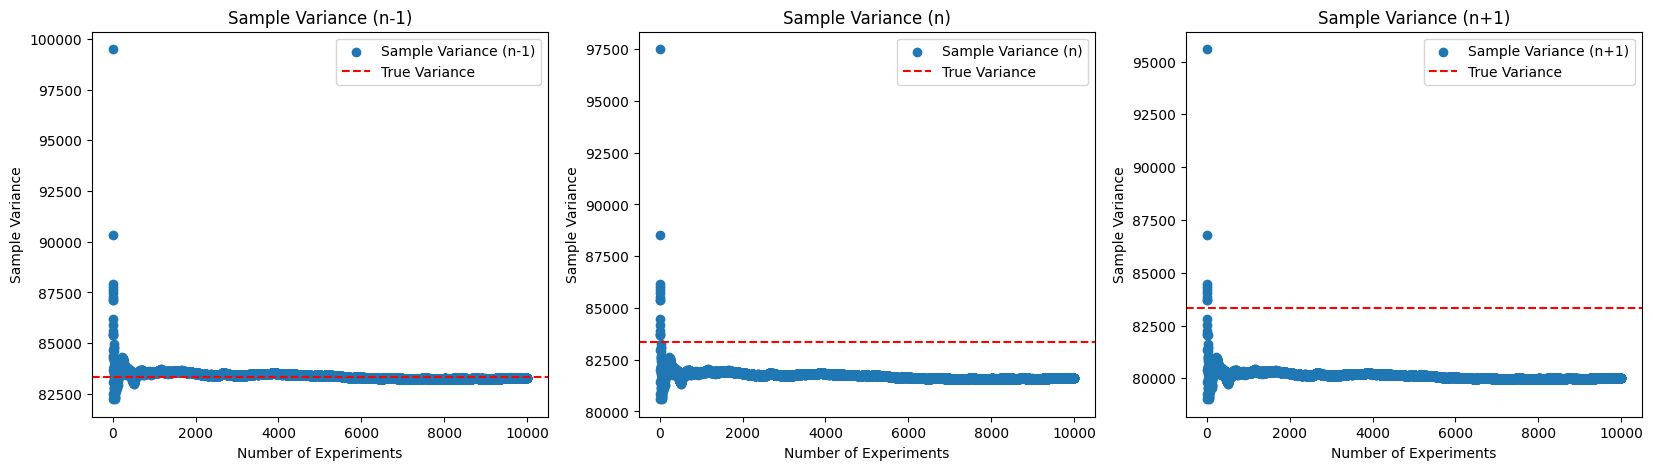

In [47]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(range(n_experiments), avg1, label='Sample Variance (n-1)')
plt.axhline(y=variance, color='r', linestyle='--', label='True Variance')
plt.xlabel('Number of Experiments')
plt.ylabel('Sample Variance')
plt.title('Sample Variance (n-1)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(range(n_experiments), avg2, label='Sample Variance (n)')
plt.axhline(y=variance, color='r', linestyle='--', label='True Variance')
plt.xlabel('Number of Experiments')
plt.ylabel('Sample Variance')
plt.title('Sample Variance (n)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(n_experiments), avg3, label='Sample Variance (n+1)')
plt.axhline(y=variance, color='r', linestyle='--', label='True Variance')
plt.xlabel('Number of Experiments')
plt.ylabel('Sample Variance')
plt.title('Sample Variance (n+1)')
plt.legend()

plt.show()



<h3 align='center'>Part (e)</h3>

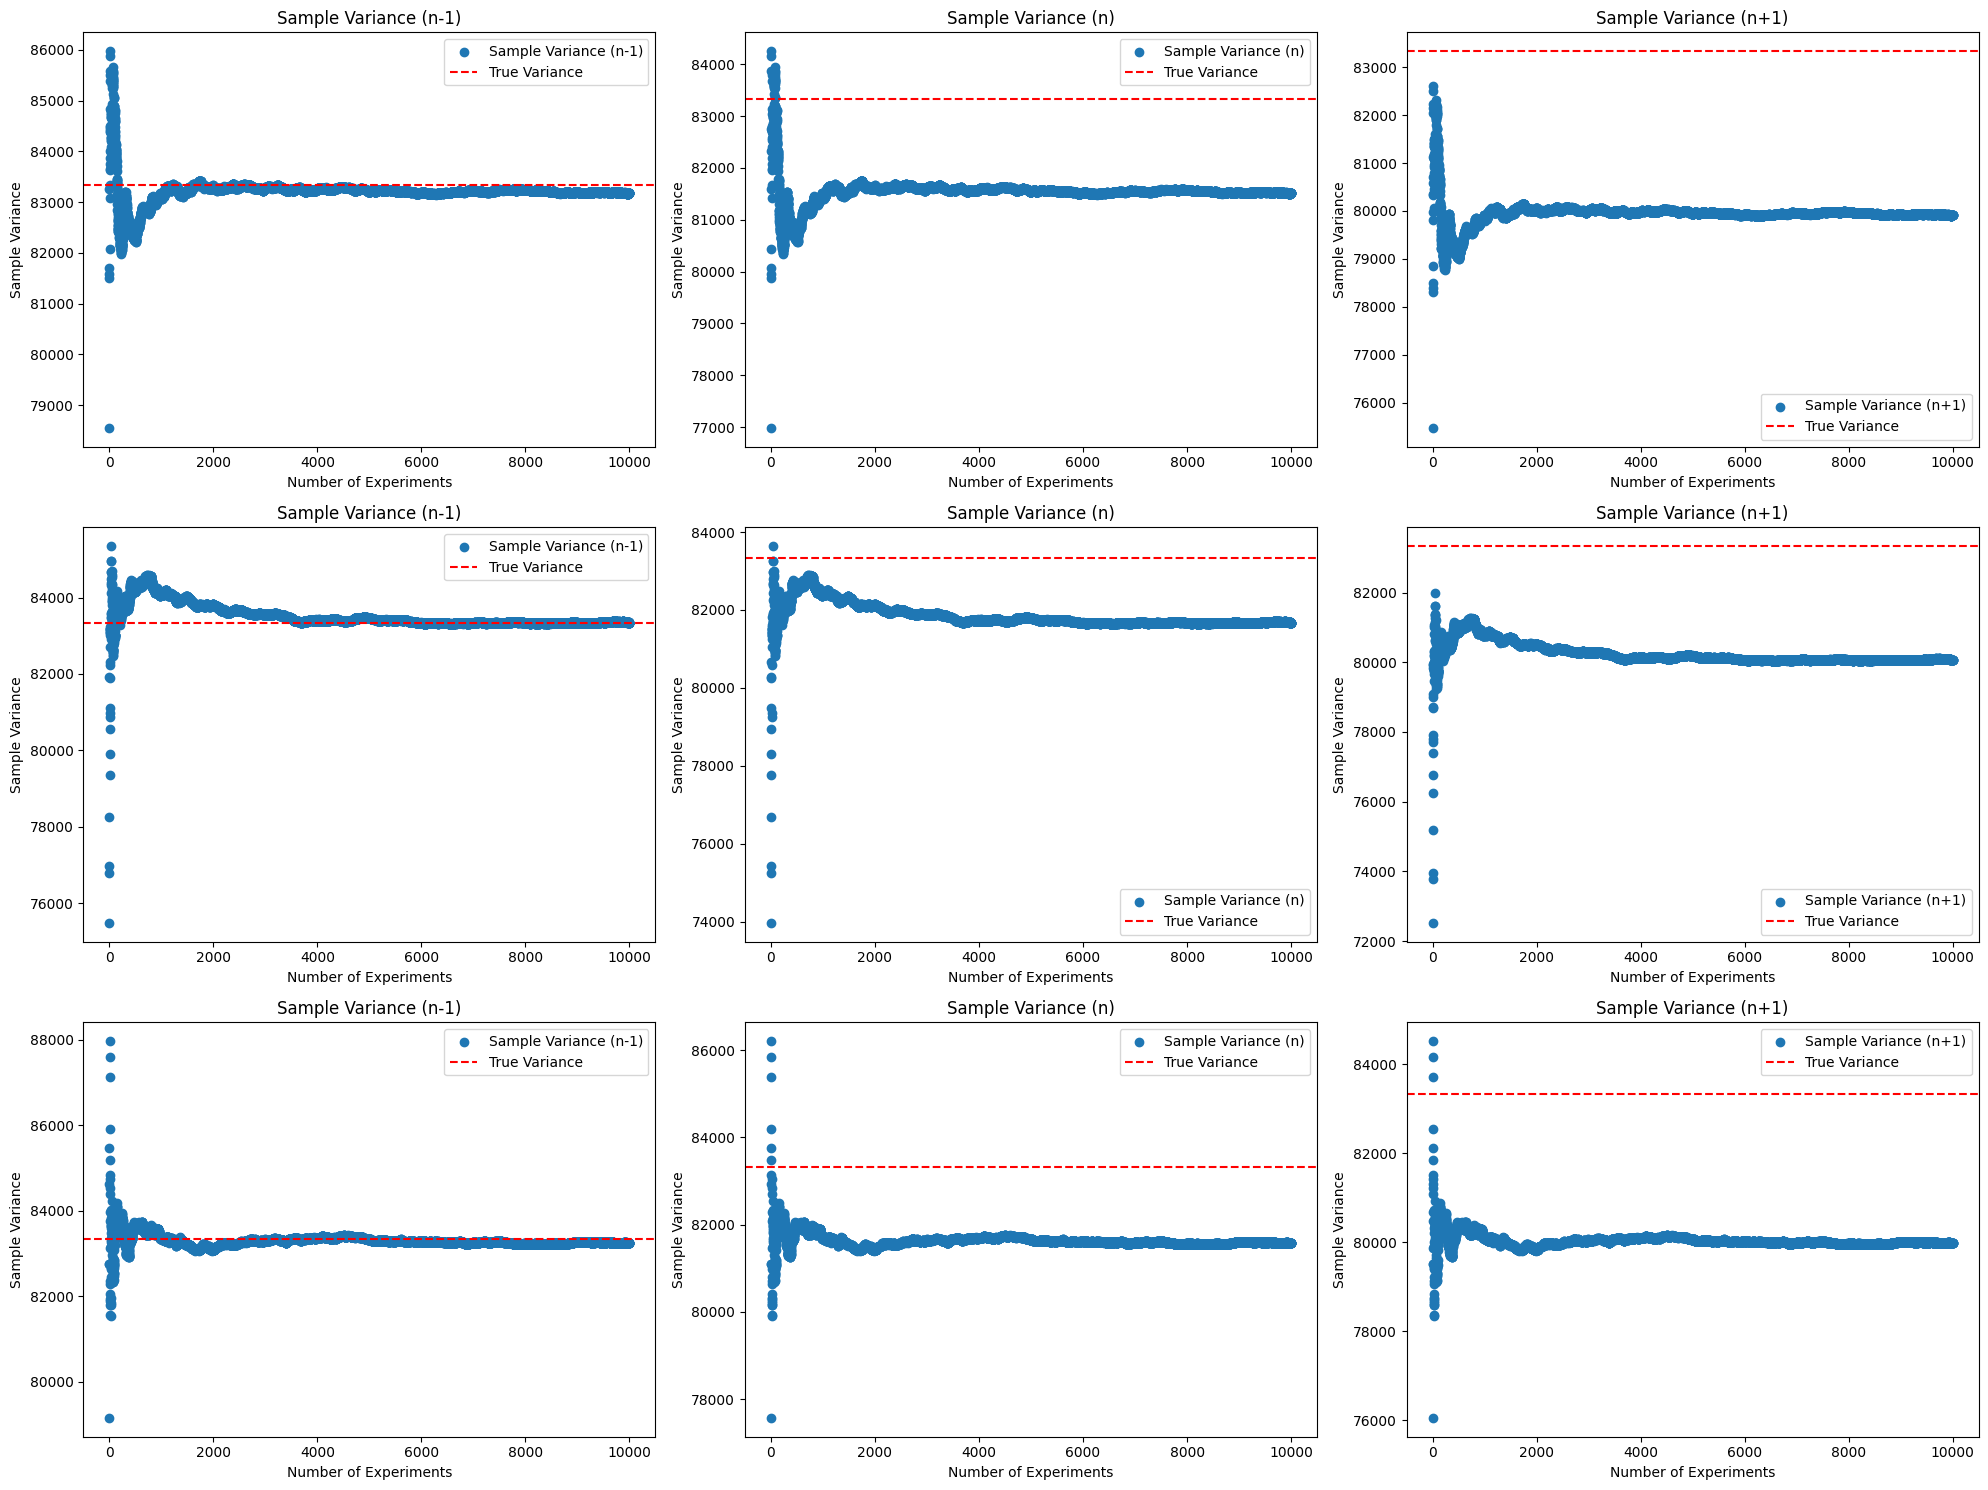

In [48]:
def run_experiment_sampling(times):
    avg1_global = []
    avg2_global = []
    avg3_global = []
    n_experiments = 10000

    for _ in range(times):
        avg1 = []
        avg2 = []
        avg3 = []

        for exp in range(n_experiments):
            sample = np.random.choice(data, 50, replace=True)
            mean = get_mean(sample)

            var1 = np.sum((sample - mean) ** 2) / (len(sample) - 1)
            var2 = np.sum((sample - mean) ** 2) / (len(sample))
            var3 = np.sum((sample - mean) ** 2) / (len(sample) + 1)

            if not avg1:
                avg1.append(var1)
                avg2.append(var2)
                avg3.append(var3)
            else:
                avg1.append((avg1[-1] * exp + var1) / (exp + 1))
                avg2.append((avg2[-1] * exp + var2) / (exp + 1))
                avg3.append((avg3[-1] * exp + var3) / (exp + 1))

        avg1_global.append(avg1)
        avg2_global.append(avg2)
        avg3_global.append(avg3)

    plt.figure(figsize=(20, 5 * times))
    # make 3x1 graph for each experiment within one plot with subplots
    for i in range(times):
        plt.subplot(times, 3, 3 * i + 1)
        plt.scatter(range(n_experiments), avg1_global[i], label='Sample Variance (n-1)')
        plt.axhline(y=variance, color='r', linestyle='--', label='True Variance')
        plt.xlabel('Number of Experiments')
        plt.ylabel('Sample Variance')
        plt.title('Sample Variance (n-1)')
        plt.legend()

        plt.subplot(times, 3, 3 * i + 2)
        plt.scatter(range(n_experiments), avg2_global[i], label='Sample Variance (n)')
        plt.axhline(y=variance, color='r', linestyle='--', label='True Variance')
        plt.xlabel('Number of Experiments')
        plt.ylabel('Sample Variance')
        plt.title('Sample Variance (n)')
        plt.legend()

        plt.subplot(times, 3, 3 * i + 3)
        plt.scatter(range(n_experiments), avg3_global[i], label='Sample Variance (n+1)')
        plt.axhline(y=variance, color='r', linestyle='--', label='True Variance')
        plt.xlabel('Number of Experiments')
        plt.ylabel('Sample Variance')
        plt.title('Sample Variance (n+1)')
        plt.legend()

    plt.tight_layout()
    plt.show()

run_experiment_sampling(3)

For all the experiments it can be seen that the sample variance with (n-1) samples converges to the true variance. <br>
The sample variance with (n-1) in the denominator, which is often used in statistics to estimate the population variance, approaches the true variance more quickly because it's an unbiased estimator of the population variance.

## Question 3

<h3 align='center'>Part (d)</h3>

For k=3, Average number of rolls required : 6.3642


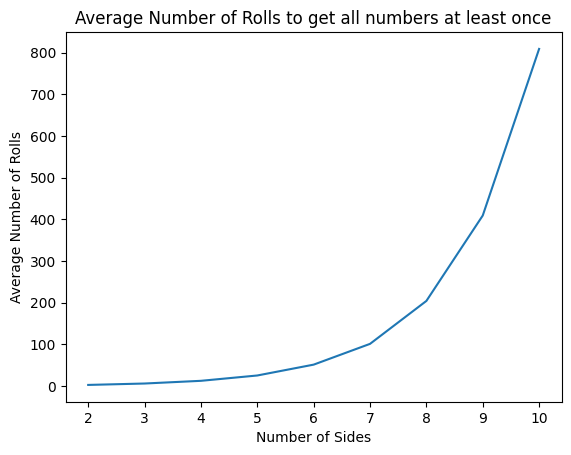

In [49]:
def dice_roll_experiment(k):
    probabilities = [1/(2**(k-1))]
    probabilities += [1/(2**(i-1)) for i in range(2, k+1)]

    # print(probabilities)

    roll_sum = 0
    n_rolls = 10000

    choices = list(range(1, k+1))

    for i in range(n_rolls):
        found = [False] * k
        counter = 0
        while not all(found):
            roll = np.random.choice(choices, p=probabilities)
            found[roll-1] = True
            counter += 1
        roll_sum += counter

    return roll_sum / n_rolls

def plot_dice_rolls():
    k_values = list(range(2, 11))
    avg_rolls = [dice_roll_experiment(k) for k in k_values]
    print("For k=3, Average number of rolls required :", avg_rolls[1])

    plt.plot(k_values, avg_rolls)
    plt.xlabel('Number of Sides')
    plt.ylabel('Average Number of Rolls')
    plt.title('Average Number of Rolls to get all numbers at least once')
    plt.show()

plot_dice_rolls()

As it can be observed, the answer obtained in part (c) matches the plot.

## Question 4

In [50]:
hurricane_data = pd.read_csv('Assignment-1 - Hurricane.csv')

hurricane_data.describe()

,Season,Max. sustained winds(mph),Minimum pressure(mbar)
count,101.000000,101.000000,101.000000
mean,1951.158416,141.881188,939.376238
std,37.973078,7.837458,9.950730
min,1853.000000,130.000000,916.000000
25%,1929.000000,140.000000,933.000000
50%,1954.000000,140.000000,939.000000
75%,1984.000000,150.000000,945.000000
max,2004.000000,155.000000,975.000000


In [51]:
hurricane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       101 non-null    object
 1   Season                     101 non-null    int64 
 2   Month                      101 non-null    object
 3   Max. sustained winds(mph)  101 non-null    int64 
 4   Minimum pressure(mbar)     101 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.1+ KB


<h3 align='center'>Part (a)</h3>

In [52]:
t_value, df = t_test_correlation(hurricane_data['Max. sustained winds(mph)'], hurricane_data['Minimum pressure(mbar)'])
print(t_value, df)


-5.497270157344813 99


In [53]:
alpha = 0.01

# value of t critical for 99 degrees of freedom at alpha = 0.001 is 3.391
t_critical = 2.626

if t_value > t_critical:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


Null Hypothesis : Max wind speed and Minimum pressure are correlated.

Therefore Max wind speed and Minimum pressure are correlated according to the test.

<h3 align='center'>Part (b)</h3>

In [54]:
import re

# make empty dataframe with same columns
hurricane_data_2 = hurricane_data.copy()

hurricane_data_month = pd.DataFrame(columns=hurricane_data.columns)

hurricane_data_2.loc[hurricane_data['Month'] == 'Aug-13', 'Month'] = 'August'

months = ["July", "August", "September", "October", "November"]

def get_months(text):
    found_months = []
    for num, month in enumerate(months):
        if re.search(month, text, re.IGNORECASE):
            found_months.append(num)
    return found_months

for index, row in hurricane_data_2.iterrows():
    current_months = row["Month"].strip()
    found_months = get_months(current_months)

    for month in found_months:
        new_row = row.copy()
        new_row["Month"] = month 
        hurricane_data_month = pd.concat([hurricane_data_month, pd.DataFrame([new_row])], ignore_index=True)

t_value, df = t_test_correlation(hurricane_data_month['Max. sustained winds(mph)'], hurricane_data_month['Month'])

print(t_value, df)

0.10457610438545828 135


In [55]:
alpha = 0.025

# critical t value for 135 degrees and alpha = 0.025 is 2.358
t_critical = 2.358

if abs(t_value) > t_critical:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


Null Hypothesis: max sustained wind speed depends on the month of its occurence.

Therefore, max sustained wind speed depends on the month of its occurence.

<h3 align='center'>Part (c)</h3>

In [56]:
import scipy.stats as stats

def poisson_goodness_of_fit(data):
    observed_freq = {}
    for i in data:
        if i not in observed_freq:
            observed_freq[i] = 0
        observed_freq[i] += 1
    
    lambda_est = get_mean(data)

    expected_freqs = {}
    for i in observed_freq:
        expected_freqs[i] = (stats.poisson.pmf(i, lambda_est) * len(data))

    # scale the data since the sum of observed frequencies should be equal to the sum of expected frequencies for chi squared test
    total_observed = sum(observed_freq.values())
    total_expected = sum(expected_freqs.values())
    scaling_factor = total_observed / total_expected

    for i in expected_freqs:
        expected_freqs[i] *= scaling_factor

    chi_square_stat = 0
    for i in observed_freq:
        chi_square_stat += (observed_freq[i] - expected_freqs[i])**2 / expected_freqs[i]

    df = len(observed_freq) - 1 - 1
    return chi_square_stat, df

wind_data = hurricane_data['Max. sustained winds(mph)']

chi_square_stat, df = poisson_goodness_of_fit(wind_data)
print(chi_square_stat, df)

5.649893997595146 3


In [57]:
# value of chi square for 3 degrees of freedom at alpha = 0.1 is 6.251
chi_critical = 6.251

if chi_square_stat > chi_critical:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


Null Hypothesis : max sustained wind speed follows a poisson distribution.

Therefore, max sustained wind speed follows a poisson distribution from the test.